<a href="https://colab.research.google.com/github/yuriborg/time_series/blob/main/Differencing_Detrend_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advantages in identify trends:

A trend is a continued increase or decrease in the series over time. There can be benefit in identifying, modeling, and even removing trend information from your time series dataset.

Identifying and understanding trend information can aid in improving model performance; below are a few reasons:

  - Faster Modeling: Perhaps the knowledge of a trend or lack of a trend can suggest methods and make model selection and evaluation more efficient.
  - Simpler Problem: Perhaps we can correct or remove the trend to simplify modeling and improve model performance.
  - More Data: Perhaps we can use trend information, directly or as a summary, to provide additional information to the model and improve model performance.


# Types of Trends:

Two general classes that we may think about are:

  - Deterministic Trends: These are trends that consistently increase or decrease.
  - Stochastic Trends: These are trends that increase and decrease inconsistently.


We can think about trends in terms of their scope of observations.

  - Global Trends: These are trends that apply to the whole time series.
  - Local Trends: These are trends that apply to parts or subsequences of a time series.
Generally, global trends are easier to identify and address.

# Identifying a Trend

You can plot time series data to see if a trend is obvious or not.

The difficulty is that in practice, identifying a trend in a time series can be a subjective process. As such, extracting or removing it from the time series can be just as subjective.

Create line plots of your data and inspect the plots for obvious trends.

Add linear and nonlinear trend lines to your plots and see if a trend is obvious.

# Removing a Trend
A time series with a trend is called non-stationary.

An identified trend can be modeled. Once modeled, it can be removed from the time series dataset. This is called detrending the time series.

If a dataset does not have a trend or we successfully remove the trend, the dataset is said to be trend stationary.



  - From a machine learning perspective, a trend in your data represents two opportunities:

    - Remove Information: To remove systematic information that distorts the relationship between input and output variables.

    - Add Information: To add systematic information to improve the relationship between input and output variables.

Specifically, a trend can be removed from your time series data (and data in the future) as a data preparation and cleaning exercise. This is common when using statistical methods for time series forecasting, but does not always improve results when using machine learning models.

Alternately, a trend can be added, either directly or as a summary, as a new input variable to the supervised learning problem to predict the output variable.

One or both approaches may be relevant for your time series forecasting problem and may be worth investigating.

# Practical Example: Shampoo Sales Dataset

<ipython-input-1-a6b79817b14a>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-1-a6b79817b14a>:9: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv',


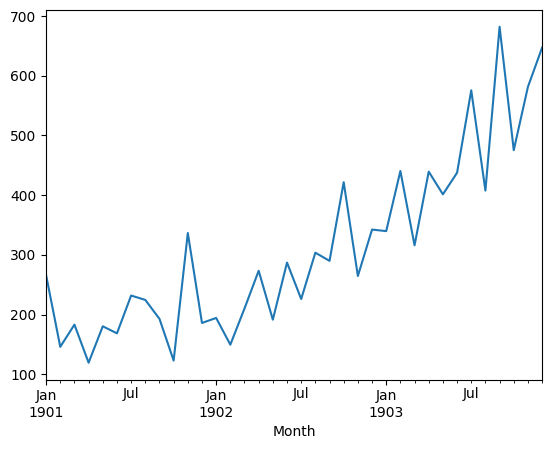

In [ ]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt

def parser(x):
 return datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv',
                     header=0,
                     parse_dates=[0],
                     index_col=0,
                     squeeze=True,
                     date_parser=parser)
series.plot()
plt.show()

## Difference Transform

Differencing is a method of transforming a time series dataset.

It can be used to remove the series dependence on time, so-called temporal dependence. This includes structures like trends and seasonality.

Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.

Differencing is performed by subtracting the previous observation from the current observation.

$difference(t) = observation(t) - observation(t-1)$

Inverting the process is required when a prediction must be converted back into the original scale.

This process can be reversed by adding the observation at the prior time step to the difference value.

$inverted(t) = differenced(t) + observation(t-1)$
In this way, a series of differences and inverted differences can be calculated.

## Detrending by Differencing

  - Specifically, a new series is constructed where the value at the current time step is calculated as the difference between the original observation and the observation at the previous time step.


  $value(t) = observation(t) - observation(t-1)$

  This has the effect of remove a trend fom the time series

Below, we will create the differencing detrended version of the shampoo sales time series:

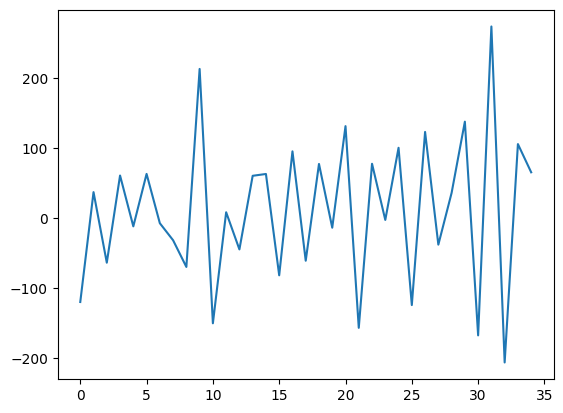

In [ ]:
X = series.values
diff = list()

for i in range(1, len(X)):
 value = X[i] - X[i - 1]
 diff.append(value)

plt.plot(diff)
plt.show()

  - This approach works well for data with a linear trend. If the trend is quadratic (the change in the trend also increases or decreases), then a difference of the already-differenced dataset can be taken, a second level of differencing. This process can be further repeated if needed.

  - Because differencing only requires the observation at the previous time step, it can easily be applied to unseen out-of-sample data to either preprocess or provide an additional input for supervised learning.

## Detrend by Model Fitting


A trend is often easily visualized as a line through the observations.

Linear trends can be summarized by a linear model, and nonlinear trends may be best summarized using a polynomial or other curve-fitting method.

Because of the subjective and domain-specific nature of identifying trends, this approach can help to identify whether a trend is present. Even fitting a linear model to a trend that is clearly super-linear or exponential can be helpful.

In addition to being used as a trend identification tool, these fit models can also be used to detrend a time series.

The predictions from this model will form a straight line that can be taken as the trend line for the dataset. These predictions can also be subtracted from the original time series to provide a detrended version of the dataset.

$value(t) = observation(t) - prediction(t)$

The residuals from the fit of the model are a detrended form of the dataset. Polynomial curve fitting and other nonlinear models can also be used.

In [ ]:
X = [i for i in range(0, len(series))]
X = np.reshape(X, (len(X), 1))

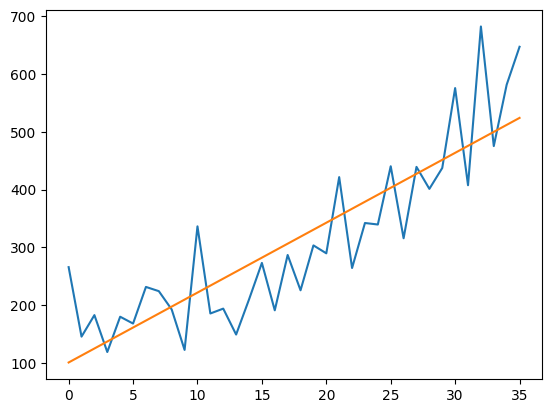

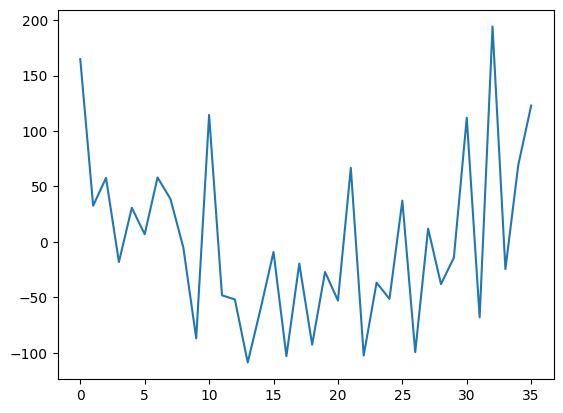

In [ ]:
from sklearn.linear_model import LinearRegression

# fit linear model
X = [i for i in range(0, len(series))]
X = np.reshape(X, (len(X), 1))
y = series.values

model = LinearRegression()
model.fit(X, y)

# calculate trend
trend = model.predict(X)

# plot trend
plt.plot(y)
plt.plot(trend)
plt.show()

# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]

# plot detrended
plt.plot(detrended)
plt.show()

## Differencing to remove Seasonality

A repeating pattern within each year is known as seasonal variation, although the term is applied more generally to repeating patterns within any fixed period.

Basically, Seasonal variation, or seasonality, are cycles that repeat regularly over time.

In [ ]:
from math import sin, radians
from math import radians

# create a differenced series
def difference(dataset, interval=1):
 diff = list()
 for i in range(interval, len(dataset)):
  value = dataset[i] - dataset[i - interval]
  diff.append(value)
 return diff

# invert differenced forecast
def inverse_difference(last_ob, value):
 return value + last_ob


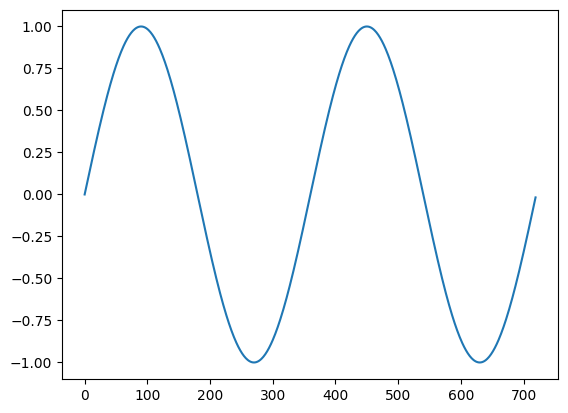

In [ ]:
# define a dataset with seasonality
data = [sin(radians(i)) for i in range(360)] + [sin(radians(i)) for i in range(360)]
plt.plot(data)
plt.show()

The code above first creates and plots the dataset of two cycles of the 360 time step series.

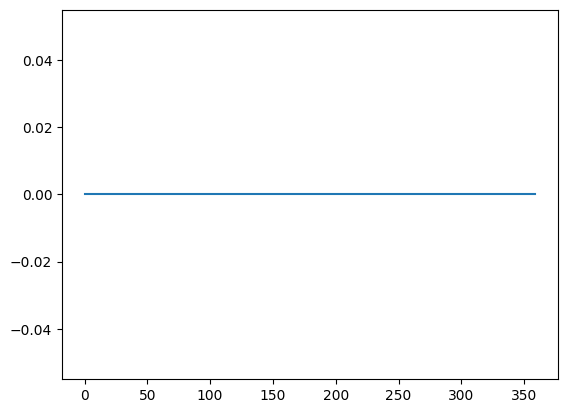

In [ ]:
# difference the dataset
diff = difference(data, 360)
plt.plot(diff)
plt.show()

Now difference transform is applied and the result is plotted. The plot shows 360 zero values with all seasonality signal removed.

Here, differencing was applied with a lag of 1, which means the first value was sacrificed. Here an entire cycle is used for differencing, that is 360 time steps. The result is that the entire first cycle is sacrificed in order to difference the second cycle.

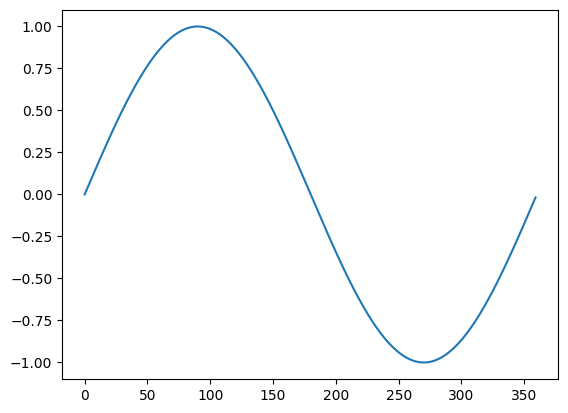

In [ ]:
# invert the difference
inverted = [inverse_difference(data[i], diff[i]) for i in range(len(diff))]
plt.plot(inverted)
plt.show()

Finally, the transform is inverted showing the second cycle with the seasonality restored.